# Problem set 3 (90 pts)

## Important note: the template for your solution filename is Name_Surname_PS3.ipynb
For this problem set we do not run the bot, so try to debug your solutions with your own simple tests

## Problem 1 (20 pts)

- (5 pts) Prove that $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$ if $\mathrm{vec}(X)$ is a columnwise reshape of a matrix into a long vector. What does it change if the reshape is rowwise? 

**Note:** 
1. To make a columnwise reshape in Python one should use ```np.reshape(X, order='f')```, where the string ```'f'``` stands for the Fortran ordering. 
2. If $\mathrm{vec}(X)$ is a rowwise reshape,
$$\mathrm{vec}(AXB)=(A \otimes B^\top) \mathrm{vec}(X).$$


- (2 pts) What is the complexity of a naive computation of $(A \otimes B) x$? Show how it can be reduced.

- (3 pts) Let matrices $A$ and $B$ have eigendecompositions $A = S_A\Lambda_A S_A^{-1}$ and $B = S_B\Lambda_B S^{-1}_B$. Find eigenvectors and eigenvalues of the matrix $A\otimes I + I \otimes B$.


- (10 pts) Let $A = \mathrm{diag}\left(\frac{1}{1000},\frac{2}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Estimate analytically the number of iterations required  to solve linear system with $A$ with the relative accuracy $10^{-4}$ using
    - Richardson iteration with the optimal choice of parameter (use $2$-norm)
    - Chebyshev iteration (use $2$-norm)
    - Conjugate gradient method (use $A$-norm).

## My solution is here
- 
$$ (AXB)_{fg} = \sum\limits_{i=1}^n A_{fi}(XB)_{ig} = \sum\limits_{i=1}^n A_{fi}  \sum\limits_{k=1}^n X_{ik}B_{kg} =  \sum\limits_{i=1}^n \sum\limits_{k=1}^n A_{fi}X_{ik}B_{kg} $$
$$ \mathrm{vec}(AXB) = \left[\sum\limits_{i=1}^n \sum\limits_{k=1}^n A_{1i}X_{ik}B_{k1}, \dots, \sum\limits_{i=1}^n \sum\limits_{k=1}^n A_{ni}X_{ik}B_{k1}, \dots,\dots, \sum\limits_{i=1}^n\sum\limits_{k=1}^n A_{1i}X_{ik}B_{kn}, \dots, \sum\limits_{i=1}^n\sum\limits_{k=1}^n A_{ni}X_{ik}B_{kn}\right]^\top$$
$$ (B^\top \otimes A)\, \mathrm{vec}(X) = (B^\top \otimes A)\, \left[X_{11}, \dots, X_{n1}, \dots, \dots, X_{1n}, \dots, X_{nn}\right]^\top = $$ $$=\left[\sum\limits_{i=1}^n\sum\limits_{k=1}^n B_{k1}A_{1i}X_{ik}, \dots, \sum\limits_{i=1}^n\sum\limits_{k=1}^nB_{k1} A_{ni}X_{ik},\dots, \dots, \sum\limits_{i=1}^n\sum\limits_{k=1}^n B_{kn}A_{1i}X_{ik},\dots, \sum\limits_{i=1}^n\sum\limits_{k=1}^n B_{kn}A_{ni}X_{ik}\right]^\top$$
$$
$$
- Let $A$ and $B$ have sizes $(n\times n)$ and $x$ - $(n^2\times 1)$. Then complexity of $a_{ij}B$ is $O(n^2)$ and complexity of  $(A \otimes B)x$ is $O(n^4)$. Matvec multiplication in this case requires $O((n^2)^2) = O(n^4)$, so that copmlexity of all operation is $O(n^4)$. We can reshape $x$ to matrix as in previous task, and by the formula from previous task we can deal with matrix by matrix product, which complexity is $O(n^3)$.
$$
$$
- Let $x_A$, $x_B$ -eigenvectors of $A$ and $B$, columns of $S_A$ and $S_B$, and $\lambda_A$ and $\lambda_B$ - corresponding eigenvalues from diagonals matrices.$(A\otimes I + I \otimes B)\,(x_A\otimes x_B) = (A\otimes I)(x_A\otimes x_B)+ (I \otimes B)(x_A\otimes x_B) = (Ax_A\otimes x_B)+(x_A\otimes Bx_B) = (x_A\lambda_A \otimes x_B) +(x_A \otimes x_B\lambda_B ) =$ $=(\lambda_A+\lambda_B)(x_A \otimes x_B)$ - one pair of eigenvector and eigenvalues. If we consider all combination of $x_A$, $x_B$, we obtain all eigenvectors and eigenvalues.
$$
$$
- 1)Richardson interation : $e_{k+1} \leq cq^k=c\left(\frac{cond(A) -1}{cond(A) + 1}\right)^k < 10^{-4}$,    $cond(A)=\frac{\lambda_{max}}{\lambda_{min}} = \frac{1000}{\frac{1}{1000}} = 10^6$,  $k = -4\log_q{10} = \frac{-4}{\lg(q)} \approx 4,6*10^6$
$$
$$
  2)Chebyshev iteration:  $e_{k+1} \leq cq^k=c\left(\frac{\sqrt{cond(A)} -1}{\sqrt{cond(A)} + 1}\right)^k$, 
  $k = \frac{-4}{\lg(q)} \approx 4,6*10^3$
$$
$$
  3)Conjugate gradient method (using $A$-norm) 
  $\frac{\Vert x_k - x_* \Vert_A }{\Vert x_* \Vert_A} \leq \gamma \left( \frac{\sqrt{\mathrm{cond}(A)}-1}{\sqrt{\mathrm{cond}(A)}+1}\right)^k.$ Then approximation will be similar to Chebyshev iteration. $ k = \frac{-4}{\lg(q)} \approx 4,6*10^3$

## Problem 2 (40 pts)

### Spectral graph partitioning and inverse iteration


Given connected graph $G$ and its corresponding graph Laplacian matrix $L = D - A$ with eigenvalues $0=\lambda_1, \lambda_2, ..., \lambda_n$, where $D$ is its degree matrix and $A$ is its adjacency matrix, *Fiedler vector* is an eignevector correspondng to the second smallest eigenvalue $\lambda_2$ of $L$. Fiedler vector can be used for graph partitioning: positive values correspond to the one part of a graph and negative values to another.

### Inverse power method (15 pts)

To find the Fiedler vector we will use the inverse iteration with adaptive shifts (Rayleigh quotient iteration). 

* (5 pts) Write down the orthoprojection matrix on the space orthogonal to the eigenvector of $L$, corresponding to the eigenvalue $0$ and prove (analytically) that it is indeed an orthoprojection.
 
* (5 pts) Implement the spectral partitioning as the function ```partition```:

## Theoretical problem
$I-\frac{ee^{T}}{(e,e)}$, where $e = [1, 1, \dots\dots, 1]^\top$, vector which corresponds to the 0 eigenvalue. 
$(I-\frac{ee^{T}}{(e,e)})x = x-\frac{(x, e)}{(e,e)}e = y$ - projection to space that is orthigonal to $e$. Let's prove that $y$ is orthogonal to $e$.
$(y, e) = (x-\frac{(x, e)}{(e,e)}e, e) = (x,e)-\frac{(x, e)(e,e)}{(e,e)} = (x,e)-(x,e) = 0.$

In [1]:
import numpy as np
from scipy.sparse.linalg import spsolve, eigsh
from scipy.sparse import csr_matrix, lil_matrix, eye, spdiags, diags
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# INPUT:
# A - adjacency matrix (scipy.sparse.csr_matrix)
# num_iter_fix - number of iterations with fixed shift (int)
# shift - (float number)
# num_iter_adapt - number of iterations with adaptive shift (int) -- Rayleigh quotient iteration steps
# x0 - initial guess (1D numpy.ndarray)
# eps - relative tolerance (float)
# OUTPUT:
# x - normalized Fiedler vector (1D numpy.ndarray)
# eigs - eigenvalue estimations at each step (1D numpy.ndarray)

def partition(A, shift, num_iter_fix, num_iter_adapt, x0, eps):
    x = x0.reshape(x0.shape[0],)
    n = A.shape[0]
    eigs = []
    L = csr_matrix(spdiags(A.sum(axis=1).T, 0, n, n, 'csr') - A)
    i = -1
    for i in range(num_iter_fix):
        x_new = spsolve(csr_matrix(L-shift*eye(n)), x)
        x_new = projection(x_new)
        x = x_new/np.linalg.norm(x_new, 2)
        lambda_ = x.dot(L.dot(x))
        eigs.append(lambda_)
        if (i > 0) :
            if (abs(lambda_ - eigs[i-1])/abs(lambda_) <= eps):
                break
    if (i == num_iter_fix-1):
        if (i == -1):
            lambda_ = shift
            previous = lambda_
        else:
            previous = eigs[num_iter_fix-1]
        for j in range (num_iter_adapt):
            x_new = spsolve(csr_matrix(L-lambda_*eye(n)), x)
            x_new = projection(x_new)
            x = x_new/np.linalg.norm(x_new, 2)
            lambda_ = L.dot(x).dot(x)
            eigs.append(lambda_)
            if (abs(lambda_ - previous)/abs(lambda_) <= eps):
                break
            previous = lambda_
    eigs = np.array(eigs)
    return x, eigs

def projection(x): #orthoprojection matrix on the space orthogonal to the eigenvector of  L,corresponding to the eigenvalue  0
    n = x.shape[0]
    return x - x.dot(np.ones(n))*np.ones(n)/n

Algorithm must halt before `num_iter_fix + num_iter_adapt` iterations if the following condition is satisfied $$ \boxed{\|\lambda_k - \lambda_{k-1}\|_2 / \|\lambda_k\|_2 \leq \varepsilon} \text{ at some step } k.$$

Do not forget to use the orthogonal projection from above in the iterative process to get the correct eigenvector.
It is also a good idea to use ```shift=0``` before the adaptive stragy is used. This, however, is not possible since the matrix $L$ is singular, and sparse decompositions in ```scipy``` does not work in this case. Therefore, we first use a very small shift instead.

* (3 pts) Generate a random `lollipop_graph` using `networkx` library and find its partition. [Draw](https://networkx.github.io/documentation/networkx-1.9/examples/drawing/labels_and_colors.html) this graph with vertices colored according to the partition.

* (2 pts) Start the method with a random initial guess ```x0```, set ```num_iter_fix=0``` and comment why the method can converge to a wrong eigenvalue.

In [3]:
import networkx as nx

In [4]:
lollipop=nx.lollipop_graph(20, 20)
A = nx.adjacency_matrix(lollipop)
x0 = np.random.randn(A.shape[0])
x, eigs = partition(A, 0.001, 100, 50, x0, 0.0001)

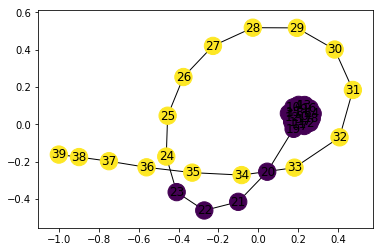

In [5]:
nx.draw_networkx(lollipop, node_color=np.sign(x))

In [16]:
x0 = np.random.randn(A.shape[0])
x_1, eigs_1 = partition(A, 0.001, 0, 20, x0, 0.0001)

In [17]:
print('Wrong eigenvalue:', eigs_1[-1])
print('Right eigenvalue:', eigs[-1])

Wrong eigenvalue: 0.05711348375439257
Right eigenvalue: 0.009913598404346028


#### When the eigenvalues under consideration are well separated, inverse iteration computes orthogonal eigenvectors. But when the eigenvalues are poorly separated, it may not be clear with which eigenvalue corresponds to computed eigenvector. And method converges to the wrong eigenvalue.

### Spectral graph properties (15 pts)

* (5 pts) Prove that multiplicity of the eigenvalue $0$ in the spectrum of the graphs Laplacian is the number of its connected components.
* (10 pts) The second-smallest eigenvalue of $L(G)$, $\lambda_2(L(G))$, is often called the algebraic connectivity of the
graph $G$. A basic intuition behind the use of this term is that a graph with a higher algebraic
connectivity typically has more edges, and can therefore be thought of as being “more connected”.  
To check this statement, create few graphs with equal number of vertices using `networkx`, one of them should be $C_{30}$ - simple cyclic graph, and one of them should be $K_{30}$ - complete graph. (You also can change the number of vertices if it makes sense for your experiments, but do not make it trivially small).
    * Find the algebraic connectivity for the each graph using inverse iteration.
    * Plot the dependency $\lambda_2(G_i)$ on $|E_i|$.
    * Draw a partition for a chosen graph from the generated set.
    * Comment on the results.

## Theoretical task
If graph has $k$ connected components than we can make its adjacency matrix block diagonal by renumbering of vertices. Then Laplacian matrix has agaian $k$ bloks. If connected component is one than zero eigenvalue has multiplicity one and eigenvector composed from ones. Let $L_1,\: L_2, \dots, L_k$ is diagonal blocks of Laplacian matrix. Then charaterics polynomial is $det(L-\lambda I) = det(L_1-\lambda I_1)det(L_2-\lambda I_2)\dots det(L_k-\lambda I_k) = 0$. Each polynomial $det(L_i-\lambda I_i)$ has one root equal to zero. Then matrix $L$ has zero egenvalue with multiplicity $k$, that is equal to number of connected components.

In [114]:
C_30 = nx.cycle_graph(30)
K_30 = nx.complete_graph(30)
Barbell = nx.barbell_graph(20, 10)
K_40 = nx.complete_graph(40)
rand_g = nx.dense_gnm_random_graph(30, 100)
C_40 = nx.cycle_graph(40)
K_20 = nx.complete_graph(20)

In [115]:
A_1 = nx.adjacency_matrix(C_30)
x0 = np.random.randn(A_1.shape[0])
x_1, eigs_1 = partition(A_1, 0.001, 100, 50, x0, 0.0001)

A_2 = nx.adjacency_matrix(K_30)
x0 = np.random.randn(A_2.shape[0])
x_2, eigs_2 = partition(A_2, 0.001, 100, 50, x0, 0.0001)

A_3 = nx.adjacency_matrix(Barbell)
x0 = np.random.randn(A_3.shape[0])
x_3, eigs_3 = partition(A_3, 0.001, 100, 50, x0, 0.0001)

A_4 = nx.adjacency_matrix(K_40)
x0 = np.random.randn(A_4.shape[0])
x_4, eigs_4 = partition(A_4, 0.001, 100, 50, x0, 0.0001)

A_5 = nx.adjacency_matrix(rand_g)
x0 = np.random.randn(A_5.shape[0])
x_5, eigs_5 = partition(A_5, 0.001, 100, 50, x0, 0.0001)

A_6 = nx.adjacency_matrix(C_40)
x0 = np.random.randn(A_6.shape[0])
x_6, eigs_6 = partition(A_6, 0.001, 100, 50, x0, 0.0001)

A_7 = nx.adjacency_matrix(K_20)
x0 = np.random.randn(A_7.shape[0])
x_7, eigs_7 = partition(A_7, 0.001, 100, 50, x0, 0.0001)

In [116]:
lambdas = [eigs_1[-1],eigs_2[-1],eigs_3[-1],eigs_4[-1], eigs_5[-1], eigs_6[-1], eigs_7[-1]]
E = [C_30.number_of_edges(), K_30.number_of_edges(), Barbell.number_of_edges(), K_40.number_of_edges(), 
     rand_g.number_of_edges(), C_40.number_of_edges(), K_20.number_of_edges()]

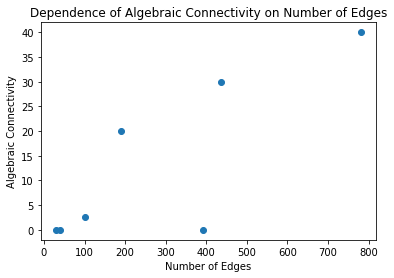

In [117]:
plt.scatter(E, lambdas)
plt.title('Dependence of Algebraic Connectivity on Number of Edges')
plt.xlabel('Number of Edges')
plt.ylabel('Algebraic Connectivity');

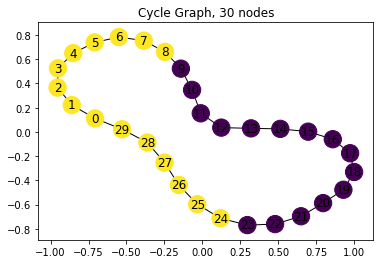

In [85]:
plt.title('Cycle Graph, 30 nodes');
nx.draw_networkx(C_30, node_color=np.sign(x_1))

#### If graph has only 1 connected component, Fiedler vector divides it into two connected part. It is true that the algebraic connectivity grows when number of edges in graph increases.

### Image bipartition (10 pts)

Let us deal here with a graph constructed from a binarized image.
Consider the rule, that graph vertices are only pixels with $1$, and each vertex can have no more than $8$ connected vertices (pixel neighbours), $\textit{i.e}$ graph degree is limited by 8.
* (3 pts) Find an image with minimal size equal to $(256, 256)$ and binarize it such that graph built on black pixels has exactly $1$ connected component.
* (5 pts) Write a function that constructs sparse adjacency matrix from the binarized image, taking into account the rule from above.
* (2 pts) Find the partition of the resulting graph and draw the image in accordance with partition.

In [86]:
# Your solution is here
from PIL import Image, ImageDraw
from scipy.sparse.csgraph import connected_components
import requests
from scipy import misc
url = 'https://pbs.twimg.com/profile_images/1658625695/my_photo_400x400.jpg'  # Ivan
face_raw = Image.open(requests.get(url, stream=True).raw)
face = np.array(face_raw).astype(np.uint8)

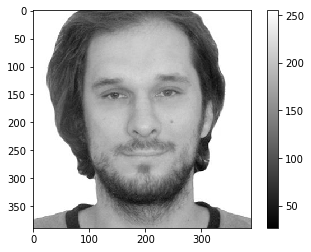

In [92]:
plt.imshow(face[:,:,0], cmap=plt.cm.gray);
plt.colorbar();

In [93]:
def binarization(img):
    y = img < 230
    return y.astype(int)

In [94]:
def graph_creator(B):
    A = lil_matrix((B.shape[0]*B.shape[1], B.shape[0]*B.shape[1]))
    n = B.shape[1]
    square = np.array([[-1,-1], [-1, 0], [-1, 1], [0, -1], [0, 1], [1, -1], [1,0], [1, 1]])
    for i in range (1, B.shape[0]-1):
        for j in range(1, B.shape[1]-1):
            if (B[i, j] == 1):
                for pair in square:
                    if (B[i+pair[0], j+pair[1]] == 1):
                        A[i*n+j, (i+pair[0])*n+(j+pair[1])] = 1
                        A[(i+pair[0])*n+(j+pair[1]), i*n+j] = 1
    return csr_matrix(A)    

In [95]:
B = binarization(face[:,:,0])

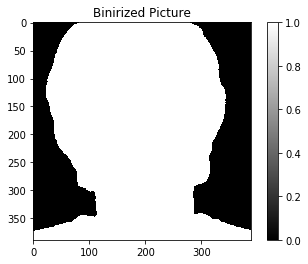

In [96]:
plt.imshow(B, cmap=plt.cm.gray)
plt.title('Binirized Picture')
plt.colorbar();

#### All white points are connected each other, so that graph built on these point will have one connected component.

In [97]:
A = graph_creator(B)

In [98]:
x0 = np.random.randn(A.shape[0])
x_img, eigs_img = partition(A, 0.0001, 100, 50, x0, 0.0001)

In [99]:
x_sign = np.sign(x_img.reshape(B.shape))
y = x_sign == 1
x_todraw = y.astype(int)

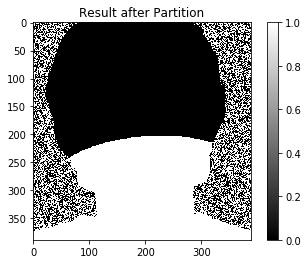

In [101]:
plt.imshow(x_todraw, cmap=plt.cm.gray);
plt.title('Result after Partition');
plt.colorbar();

#### Fiedler vector didn't take into account background and divided picture into two approximately equal parts.

## Problem 3 (30 pts)

### Say hi to the drone

You received a radar-made air scan data of a terrorist hideout made from a heavy-class surveillance drone. Unfortunately, it was made with an old-fashioned radar, so the picture is convolved with the diffractive pattern. You need to deconvolve the picture to recover the building plan.

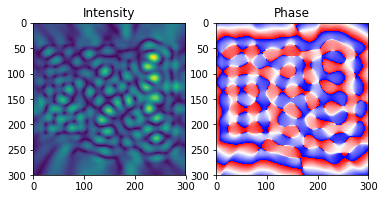

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hankel2
radiointel = np.load('radiointel.npy')
plt.subplot(1,2,1)
plt.imshow( np.abs(radiointel) )
plt.title('Intensity')
plt.subplot(1,2,2)
plt.imshow( np.angle(radiointel), cmap='bwr' )
plt.title('Phase')
plt.show()

In this problem you asked to use using FFT-matvec and make the convolution operator for the picture of the size $N\times N$, where $N=300$ with the following kernel (2D Helmholtz scattering):
$$
T_{\overline{i_1 j_1}, \overline{i_2 j_2} } \equiv eG_{i_1-j_1,i_2-j_2}  = \frac{-1j}{4} H^{(2)}_0 \left( k_0 \cdot \Delta r_{ \overline{i_1 j_1}, \overline{i_2 j_2} } \right), \quad i_1,j_1, i_2, j_2 = 0,\dots, N-1 $$

except when both $i_1=i_2$ and $j_1 = j_2$. 

In that case set $$T_{i_1=i_2, j_1=j_2} = 0$$.

Here
$1j$ is the imaginary unit, $H^{(2)}_0(x)$ - (complex-valued) Hankel function of the second kind of the order 0. See 'scipy.special.hankel2'.

$$ \Delta r_{ \overline{i_1 j_1}, \overline{i_2 j_2} } = h \sqrt{  (i_1-i_2)^2 + (j_1-j_2)^2  } $$
$$ h = \frac{1}{N-1}$$
$$k_0 = 50.0$$


### Tasks:

1. (5 pts) Create the complex-valued kernel $eG$ ($2N-1 \times 2N-1$)-sized matrix according with the instructions above. Note that at the point where $\Delta r=0$ value of $eG$ should be manually zet to zero. Store in the variable eG. Plot the eG.real of it with plt.imshow

2. (5 pts) Write function `Gx` that calculates matvec of $T$ by a given vector $x$. Make sure all calculations and arrays are in dtype=np.complex64. Hint: matvex with a delta function in pl

3. (3 pts) What is the complexity of one matvec? 
4. (2 pts) Use `scipy.sparse.linalg.LinearOperator`  to create an object that has attribute `.dot()` (this object will be further used in the iterative process). Note that `.dot()` input and output must be 1D vectors, so do not forget to use reshape.
5. (15 pts) Write a function that takes an appropriate Krylov method(s) and solves linear system $Gx=b$ to deconvolve `radiointel`. The result should be binary mask array (real, integer, of 0s and 1s) of the plane of the building. Make sure it converged sufficiently and you did the post-processing properly. Plot the result as an image. 
    
    
**Note:** You can use standart fft and ifft from e.g. `numpy.fft`


### 1. Kernel (5 pts)

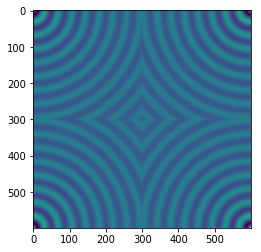

In [103]:
k0 = 50#
N = 300

def make_eG(k0, N):
    # INPUT:  
    # k0 #dtype = float
    # N #dtype = int
    
    # OUTPUT:
    # np.array, shape = (2N-1, 2N-1), dtype = np.complex64
    #delta_r = np.zeros((2*N-1, 2*N-1))
    G = np.zeros((2*N-1, 2*N-1), dtype=np.complex64)
    h = 1./(N-1)
    for i in range(-N+1, N):
        for k in range(-N+1, N):
            if (i!=0) and (k!=0):
                G[N-1+i, N-1+k] = -1j*hankel2(0,k0*h*np.sqrt(i**2+k**2))/4
    eG = np.roll(np.roll(G,-N, axis=1),-N, axis=0)
    return eG

eG = make_eG(k0=k0, N=N)

plt.imshow(eG.real);

### 2. Matvec (5 pts)

In [104]:
def Gx(x, eG):
    # input:  
    # x, np.array, shape=(N**2, ), dtype = np.complex64
    # eG, np.array, shape=(2N-1, 2N-1), dtype = np.complex64
    # output:
    # matvec, np.array, shape = (N**2, ), dtype = np.complex64
    N = int(np.sqrt(x.shape[0]))
    X = np.zeros(eG.shape, dtype = np.complex64)
    X[:N,:N] = x.reshape(N, N)
    Y = np.fft.ifft2(np.fft.fft2(eG)*np.fft.fft2(X))
    matvec = Y[:N, :N].reshape(N**2)
    return matvec

### 3. Complexity (3 pts)

Big-O complexity of one matvec operation is $O(N^2log(N))$. 1D FFT requires $O(Nlog(N))$, so that 2D FFT will require $O(N^2log(N))$ becuase it is applied to all columns and rows. Elementwise multiplication of matrices has complexity $O(N^2)$. And 2D IFFT again requires $O(N^2log(N))$ operation. That's why full complexity of this matvec mupliplication is $O(N^2log(N))$.

### 4. LinearOperator (2 pts)

In [105]:
from scipy.sparse.linalg import LinearOperator, gmres
L_Gx = LinearOperator((N**2, N**2), matvec=lambda x, eG=eG: Gx(x, eG))

### 5. Reconstruction (15pts)

C:\Users\Mac_Laren\Anaconda3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


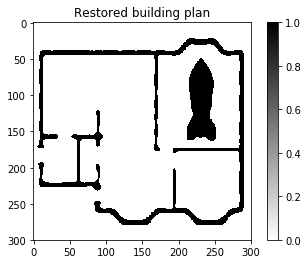

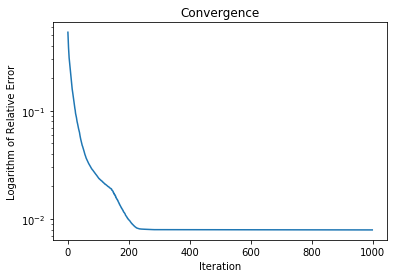

In [120]:
def normalize(mask): #proper normalization to binary mask
    mask = np.clip(mask, a_min=0, a_max=1)
    mask = np.round(mask)
    mask = np.asarray(mask, dtype=int)
    return mask

errs=[]
def callback(err): #callback function to store the history of convergence
    global errs
    errs.append(err)
    return 

solution = gmres(L_Gx, radiointel.reshape(N**2,),restart=300, maxiter = 1000 , callback = callback)
mask = np.array(solution[0], dtype=np.complex64).reshape(N, N)

plt.figure()
plt.imshow(normalize(mask) , cmap='binary')
plt.title('Restored building plan')
plt.colorbar();

plt.figure()
plt.semilogy(errs)
plt.title('Convergence');
plt.xlabel('Iteration');
plt.ylabel('Logarithm of Relative Error');